In [11]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [12]:
from EvolutionStrategy import EvolutionStrategy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from rana import rana_func

In [13]:
x_length = 5
random_seed = 0

In [18]:
mutation_method = "diagonal"
np.random.seed(random_seed)
x_max = 500
x_min = -x_max
evo_diag = EvolutionStrategy(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func, child_to_parent_ratio=10,
                             mutation_method=mutation_method, mutation_covariance_initialisation_fraction_of_range=0.03,
                            bound_enforcing_method = "not_clipping", )
x_result, objective_result = evo_diag .run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n, \
      number of objective_evaluations is {evo_diag .objective_function_evaluation_count} \
      number of generations is {evo_diag.generation_number} \
      minimum objective from all function evaluations {min(evo_diag.objective_history)}")
print(f"max standard deviation vector {evo_diag.parent_mutation_standard_deviations.max()}")

max total iterations
x_result = [0.74534935 0.48954362 0.96943099 0.9081918  0.06513949] 
 objective_result = -1751.8876292282139 
,       number of objective_evaluations is 10100       number of generations is 101       minimum objective from all function evaluations [-1751.8876292282139, -1751.8843148289773]
max standard deviation vector 0.00029739316671714244


In [8]:
mutation_method = "simple"
np.random.seed(random_seed)
x_max = 500
x_min = -x_max
evo_simple = EvolutionStrategy(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func, 
                               mutation_method=mutation_method, mutation_covariance_initialisation_fraction_of_range=0.05, 
                               child_to_parent_ratio=100)
x_result, objective_result = evo_simple.run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n, \
      number of objective_evaluations is {evo_simple .objective_function_evaluation_count} \
      number of generations is {evo_simple.generation_number}")

max total iterations
x_result = [-0.91323955 -0.93291851  0.78448946 -0.84009294 -0.46287706] 
 objective_result = -1645.559543139303 
,       number of objective_evaluations is 11000       number of generations is 11


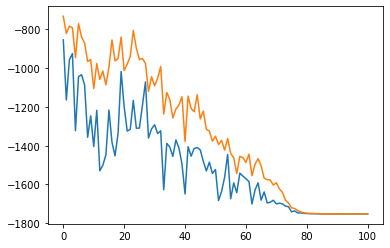

In [19]:
plt.plot(evo_diag.objective_history)

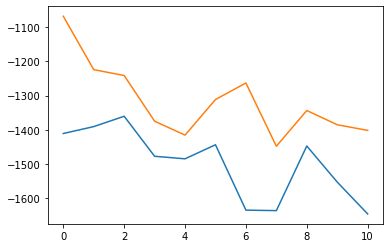

In [10]:
plt.plot(evo_simple.objective_history)

# np.frompyfunc

In [ ]:
def test_func(x):
    if np.min(x) == -10:
        return x - 100
    else:
        print(x)
        return x + 100

In [ ]:
ufunky = np.frompyfunc(test_func, nin=1, nout=1)

In [ ]:
x = np.broadcast_to(np.array([[1,2,3],[3,4,5], [5,6,7]]), (6,3,3)) + 2
x[0, 0, 0] = -10
x

In [ ]:
ufunky(x, axis=0)

# Vectorise

In [ ]:
def test_func(x):
    if np.min(x) == -10:
        return x - 100
    else:
        print(x)
        return x + 100

In [ ]:
vectorise_func = np.vectorize(test_func, signature='(k,n,m)->(n,m)', otypes=[np.float64])

In [ ]:
vectorise_func = np.vectorize(lambda x: min(x), signature='(k,n,m)->(k)', otypes=[np.float64])

In [ ]:
vectorise_func(x)

In [ ]:
x.shape

In [ ]:
func = lambda x: sum(x)**2

In [ ]:
summer = np.vectorize(func, signature='(n,m)->(m)', otypes=[np.float64])

In [ ]:
summer(x)

In [ ]:
x